# Plot kernels and associated dual kernels

In [1]:
import matplotlib.pyplot as plt
#%matplotlib notebook
#import matplotlib.pyplot as plt
from numpy import *
import numpy as np

In [2]:
def getJJ(U):
    JJ = np.zeros((len(U),len(U)))
    for i,u in enumerate(U):
        for j,v in enumerate(U):
            a = ( 1 -  np.arccos( np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v)) - 0.00000000001 ) / pi )
            JJ[i,j] = a * np.dot(u,v) / 6
    return JJ

def getU(k, kernel = np.array([1,2,1]) ):
    u = np.zeros(k)
    u[:len(kernel)] = kernel
    U = [np.roll(u,i -  int( (len(kernel)-1)/2 ) ) for i in range(k)]
    return np.array(U).T 

In [3]:
k = 100
u = np.random.randn(k)
U = getU(k,u)
print(np.linalg.norm(U), np.max(u))

99.29354175816097 2.145540072879616


In [4]:
#kernels = [ [1], [1,2,1], [1,2,3,2,1], [1,2,3,4,5,4,3,2,1] ]

#k = 10
#kernels = [ [ np.abs( np.abs(i)-p ) / (2/3*p**3 +3*p**2 + p/2)  for i in range(-p+1,p) ] for p in range(1,20)]
#print(kernels)

#for kernel in kernels:
#    U = getU(k, kernel )
#    JJ = getJJ(U)
#    print(JJ)

## Plot spectra of neural tangent kernel associated with different kernels

In [5]:
k = 300
#kernels = [ [1], [1,2,1], [1,2,3,2,1], [1,2,3,4,5,4,3,2,1] ]

#kernels = [ [ np.abs( np.abs(i)-p ) / (2/3*p**3 +3*p**2 + p/2)  for i in range(-p+1,p) ] for p in range(1,100,20)]

def plot_kernels(kernels,filename):
    spectra = []
    shapekernels = []
    mins = []
    for kernel in kernels:
        kernel = kernel / np.linalg.norm(kernel)
        U = getU(k, kernel )
        JJ = getJJ(U)
        print("\n")
        Q,S,V = np.linalg.svd(JJ)
        #fft = np.abs( np.fft.fft( JJ[0,:] ) )
        #print("fft min max: ", np.min(fft) , np.max(fft) )
        #Q,S,V = np.linalg.svd(U @ U.T )
        print("min max: ", np.min(S), np.max(S))
        mins += [np.min(S)]
        #print( np.array(sorted(S)) - np.array( sorted(fft)) )
        shapekernels += [U[ int(k/2) ,:]]
        spectra += [S]
        plt.plot(U[ int(k/2) ,:])
        plt.show()
        plt.plot(S)
        plt.show()
    xs = np.array([i for i in range(k)])
    np.savetxt(filename + "_spectra.dat", np.vstack([ xs ,np.array(spectra) ]).T , delimiter="\t")
    np.savetxt(filename + "_kernels.dat", np.vstack([ xs ,np.array(shapekernels) ]).T , delimiter="\t")
    return mins

## Triangles



min max:  0.1666664294124757 0.1666664294124757


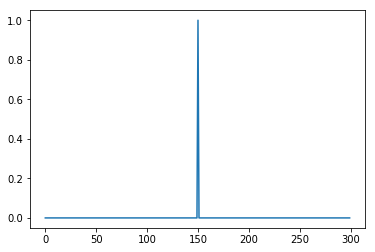

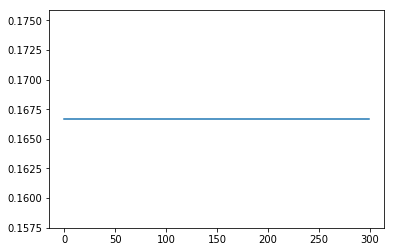



min max:  0.004869964834235159 1.957451126942472


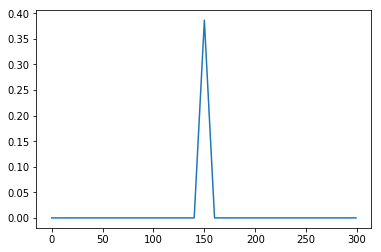

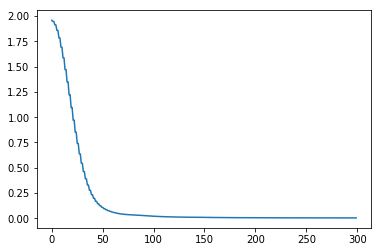



min max:  0.0015584634297893334 5.896218826235423


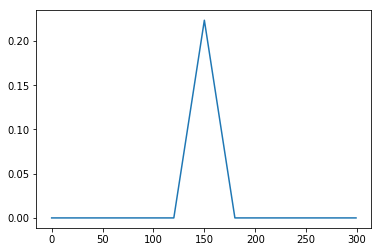

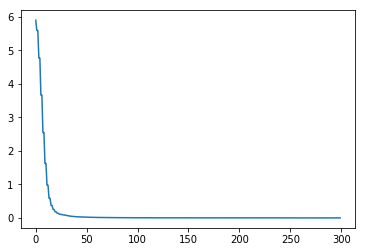

In [6]:
ps = [1,10,30]
kernels = [ [ np.abs( np.abs(i)-p )  for i in range(-p+1,p) ] for p in ps ]
mins = plot_kernels(kernels,"triangles")

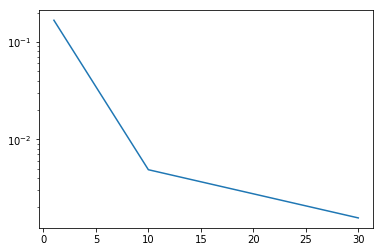

In [8]:
plt.yscale('log')
plt.plot(ps,mins)
#plt.plot(ps,[1/p/10 for p in ps] )

## Gaussians



min max:  0.0210919829944388 0.4960470114114067


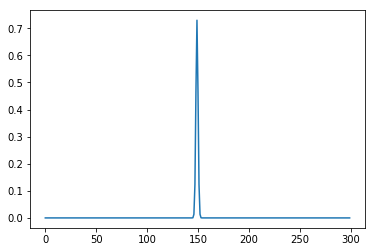

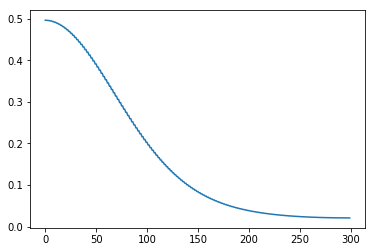



min max:  0.009148520805936729 0.9829880396044313


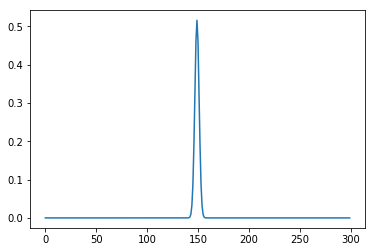

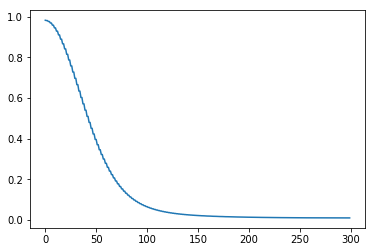



min max:  0.0017704492841324963 4.900697183926314


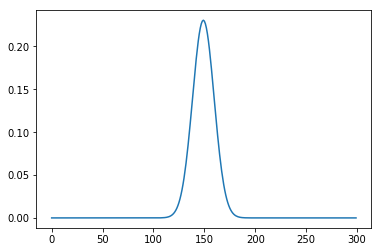

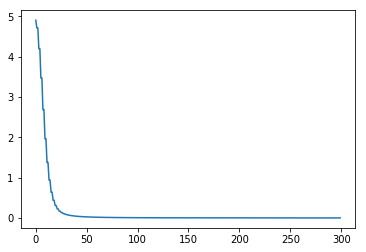

[0.0210919829944388, 0.009148520805936729, 0.0017704492841324963]

In [9]:
k=300
kernels = [ [np.exp(-p**2/sigma**2/k**2) for p in range(-int(k/2),int(k/2))] for sigma in [0.005,0.01,0.05] ]
plot_kernels(kernels,"Gaussian")

## Singular vectors of a circulant matrix

The left-singular vectors of a circulant matrix are given by
$$
V_{m,k}
=
\frac{1}{\sqrt{n}}
\begin{cases}
1 
& k = 1 \\
\sqrt{2} \cos \frac{2 \pi (k-1) (m-1) }{n} 
& k = 2,...,n/2 \\
(-1)^{m-1} 
& k = n/2 + 1
\\
\sqrt{2} \sin \frac{2 \pi (k-1) (m-1) }{n} 
& k = 2,...,n/2 
\end{cases}
$$

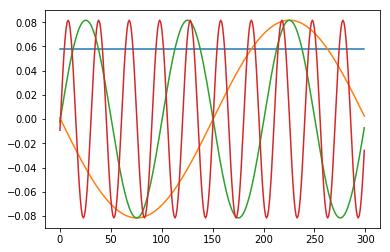

In [11]:
k = 300

kernel = [i for i in range(k)]

U = getU(k,kernel)
W,S,V = np.linalg.svd(U)

comps = [0,1,5,20]
for i,w in enumerate(W.T):
    if i in comps:
        plt.plot(-w)

js = np.array( [i for i in range(k)] )
np.savetxt("circulant_singular_vectors.dat", np.vstack([js] + [-W[:,i] for i in comps ]).T , delimiter="\t")
